<a href="https://colab.research.google.com/github/AkihitoIshizuka/test/blob/main/%E9%9B%BB%E6%B0%97%E3%83%BB%E3%82%AC%E3%82%B9%E6%A5%AD%EF%BC%88%E6%9D%B1%E8%A8%BC%E3%83%AA%E3%82%B9%E3%83%88%E3%83%BB%E5%85%A8%E9%8A%98%E6%9F%84%E3%83%BB%E7%B5%82%E5%80%A4%EF%BC%91%E6%9C%AC%2BAll%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E3%83%BB%E3%83%99%E3%83%BC%E3%82%BF%E6%8E%A8%E7%A7%BB%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*斜体テキスト*## 東証・電気・ガス業（大中型銘柄）ポートフォリオ銘柄のリスク＆リターン分析
### 特に終値データを使用した日経平均株価指数との回帰分析やベータの推移を観察する

In [8]:
!pip install yfinance
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# 日本語表示に対応させるためのモジュールインストール
!pip install japanize-matplotlib
# 日本語表示への対応
import japanize_matplotlib  # 日本語化matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import xlrd

yf.pdr_override() 

In [11]:
#!wget https://raw.githubusercontent.com/nakachan-ing/finance-streamlit/master/nikkei.csv
#filename = 'nikkei.csv'
#df_list = pd.read_csv(filename, encoding='shift-jis')
#df_list

In [12]:
!wget https://www.jpx.co.jp/markets/statistics-equities/misc/tvdivq0000001vg2-att/data_j.xls
#filename = 'data_j.xls'
df_list = pd.read_excel('data_j.xls')
print(df_list)

--2022-10-13 04:25:15--  https://www.jpx.co.jp/markets/statistics-equities/misc/tvdivq0000001vg2-att/data_j.xls
Resolving www.jpx.co.jp (www.jpx.co.jp)... 23.13.133.39
Connecting to www.jpx.co.jp (www.jpx.co.jp)|23.13.133.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 774144 (756K) [application/vnd.ms-excel]
Saving to: ‘data_j.xls.1’

data_j.xls.1        100%[===================>] 756.00K  --.-KB/s    in 0.04s   

2022-10-13 04:25:16 (17.8 MB/s) - ‘data_j.xls.1’ saved [774144/774144]

            日付   コード                                   銘柄名       市場・商品区分  \
0     20220930  1301                                    極洋    プライム（内国株式）   
1     20220930  1305                         ダイワ上場投信－トピックス       ETF・ETN   
2     20220930  1306               ＮＥＸＴ　ＦＵＮＤＳ　ＴＯＰＩＸ連動型上場投信       ETF・ETN   
3     20220930  1308                     上場インデックスファンドＴＯＰＩＸ       ETF・ETN   
4     20220930  1309  ＮＥＸＴ　ＦＵＮＤＳ　ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信       ETF・ETN   
...        ...   ...    

In [13]:
#df_list = df_list[df_list["市場・商品区分"] == "プライム（内国株式）"]
df_list = df_list[df_list["33業種区分"] == "電気・ガス業"]
df_list = df_list[df_list['規模区分'].isin(['TOPIX Core30','TOPIX Large70','TOPIX Mid400'])]  
#                  | df_list['コード'] == '1343']
df_list

,日付,コード,銘柄名,市場・商品区分,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分
3978,20220930,9501,東京電力ホールディングス,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3979,20220930,9502,中部電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3980,20220930,9503,関西電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3981,20220930,9504,中国電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3982,20220930,9505,北陸電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3983,20220930,9506,東北電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3984,20220930,9507,四国電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3985,20220930,9508,九州電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3986,20220930,9509,北海道電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3988,20220930,9513,電源開発,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400


In [14]:
# 銘柄名の変換：持株会社、銀行FG、REIT法人
df_list = df_list.replace('フィナンシャルグループ', 'ＦＧ', regex=True)
df_list = df_list.replace('フィナンシャル・グループ', 'ＦＧ', regex=True)
df_list = df_list.replace('ホールディングス', 'ＨＤ', regex=True)
df_list = df_list.replace('コーポレーション', 'Ｃ', regex=True)
df_list = df_list.replace('グループ', 'Ｇ', regex=True)
df_list = df_list.replace('投資法人', '', regex=True)
df_list

,日付,コード,銘柄名,市場・商品区分,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分
3978,20220930,9501,東京電力ＨＤ,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3979,20220930,9502,中部電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3980,20220930,9503,関西電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3981,20220930,9504,中国電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3982,20220930,9505,北陸電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3983,20220930,9506,東北電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3984,20220930,9507,四国電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3985,20220930,9508,九州電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3986,20220930,9509,北海道電力,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400
3988,20220930,9513,電源開発,プライム（内国株式）,4050,電気・ガス業,11,電力・ガス,4,TOPIX Mid400


In [15]:
#df_list['ティッカー'] = str(df_list['コード'].iloc[-1]) + '.T'
df_list['コード']

3978    9501
3979    9502
3980    9503
3981    9504
3982    9505
3983    9506
3984    9507
3985    9508
3986    9509
3988    9513
3993    9531
3994    9532
3995    9533
Name: コード, dtype: int64

In [16]:
# 個別銘のティッカー
#symbols = ['1375.T',	'1799.T',	'1828.T',	'1867.T',	'1899.T',	'2208.T',	'2220.T',	
#           '2221.T',	'2674.T',	'2872.T',	'2904.T',	'2923.T',	'3096.T',	'3865.T',	
#           '4707.T',	'5208.T',	'5446.T',	'5909.T',	'5951.T',	'6164.T',	'6364.T',	
#           '6897.T',	'7287.T',	'7327.T',	'7640.T',	'7816.T',	'7841.T',	'8218.T',	
#           '8255.T',	'8537.T',	'9017.T',	'9355.T',	'9408.T',	'9537.T',	'9842.T', '^N225']
#symbols = ['1375.T',	'1899.T',	'2220.T',	'2674.T',	'2904.T',	'3865.T',	'5208.T',	
#           '6364.T',	'7327.T',	'7816.T',	'8218.T',	'8255.T',	'9842.T', '^N225']
index = '^N225'

df = pd.DataFrame()
for code in df_list['コード']:
    symbol = str(code) + '.T'
#    print(symbol)
    print(df_list[df_list['コード']==code].iloc[-1]['銘柄名'])

    data = pdr.get_data_yahoo(symbol, start = '2019-12-30', end = '2022-12-31')['Adj Close']
#    data.name = symbol
#    data.name = df_list['銘柄名']
    data.name = df_list[df_list['コード']==code].iloc[-1]['銘柄名']
    df = pd.concat([df, data],axis = 1)

data = pdr.get_data_yahoo(index, start = '2019-12-30', end = '2022-12-31')['Adj Close']
data.name = '日経平均株価'
print(data.name)
df = pd.concat([df, data],axis = 1)

東京電力ＨＤ
[*********************100%***********************]  1 of 1 completed
中部電力
[*********************100%***********************]  1 of 1 completed
関西電力
[*********************100%***********************]  1 of 1 completed
中国電力
[*********************100%***********************]  1 of 1 completed
北陸電力
[*********************100%***********************]  1 of 1 completed
東北電力
[*********************100%***********************]  1 of 1 completed
四国電力
[*********************100%***********************]  1 of 1 completed
九州電力
[*********************100%***********************]  1 of 1 completed
北海道電力
[*********************100%***********************]  1 of 1 completed
電源開発
[*********************100%***********************]  1 of 1 completed
東京瓦斯
[*********************100%***********************]  1 of 1 completed
大阪瓦斯
[*********************100%***********************]  1 of 1 completed
東邦瓦斯
[*********************100%***********************]  1 of 1 completed
[*********************100%*********

In [17]:
for i in np.arange(len(df.index)):
    df.index.values[i] = str(df.index[i].date())

df.index = df.index.rename('Date')
#df

In [18]:
print(df)

            東京電力ＨＤ         中部電力         関西電力         中国電力        北陸電力  \
Date                                                                    
2019-12-30   467.0  1382.008423  1133.864258  1302.192139  763.207947   
2020-01-06   456.0  1357.353638  1115.930298  1299.460205  750.743469   
2020-01-07   455.0  1367.215454  1127.587402  1299.460205  756.496338   
2020-01-08   445.0  1345.250366  1115.482056  1298.549683  740.196716   
2020-01-09   445.0  1352.422607  1118.172119  1301.281494  748.825928   
...            ...          ...          ...          ...         ...   
2022-10-06   461.0  1275.000000  1163.000000   702.000000  470.000000   
2022-10-07   462.0  1255.000000  1147.000000   691.000000  467.000000   
2022-10-11   468.0  1239.000000  1136.000000   684.000000  459.000000   
2022-10-12   457.0  1220.000000  1111.000000   663.000000  438.000000   
2022-10-13   446.0  1198.000000  1093.000000   644.000000  436.000000   

                  東北電力        四国電力        九州電力    

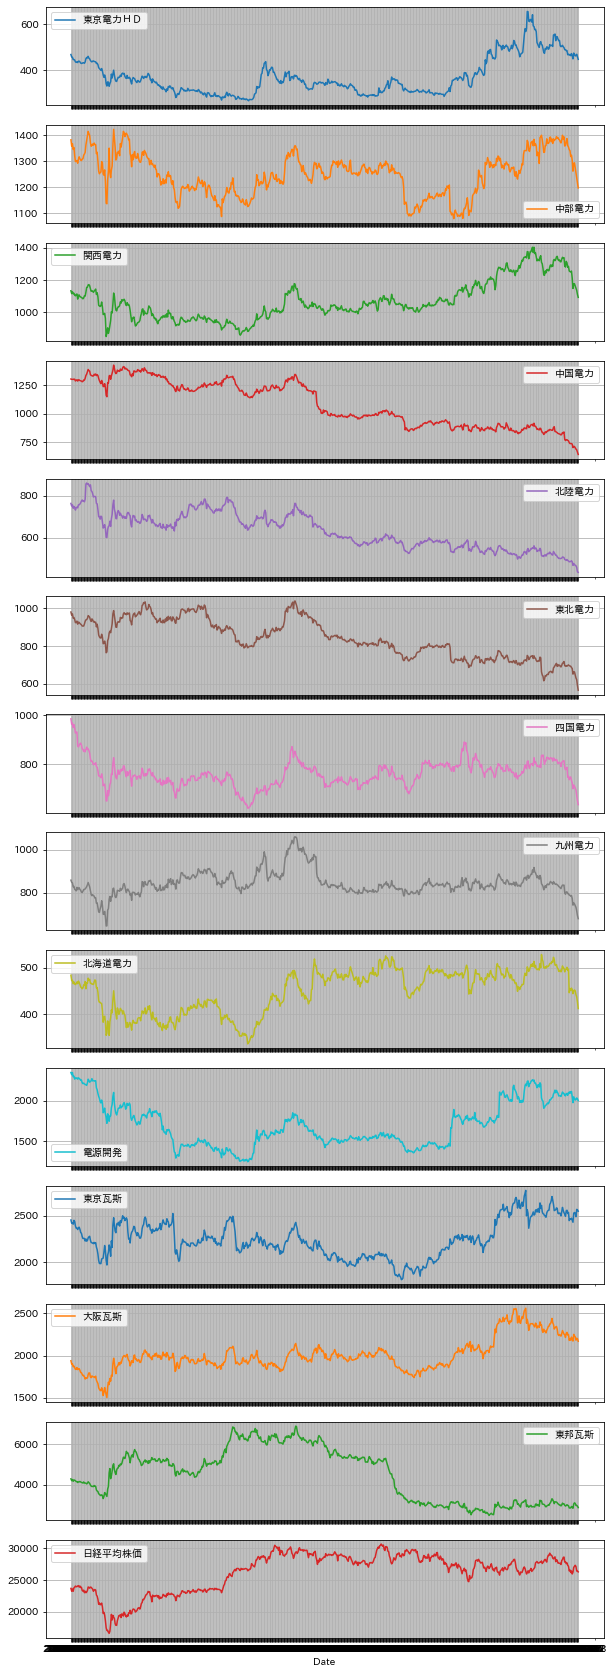

In [19]:
df.plot(figsize=(10, 30), subplots = True, grid = True)
plt.savefig('電気・ガス業・東証プライム時系列データ.png');

In [20]:
#（要選択）日次のリターンを算定（★四則演算による通常のリターン計算）
#df_rate = df.pct_change()
##df_rate = df_rate.dropna()
#df_rate

In [21]:
#（要選択）日次のリターンを算定（★自然対数収益率によるリターン計算）
lndf = np.log(df)
df_rate = lndf.diff()
#df_rate = df_rate.dropna()
df_rate

,東京電力ＨＤ,中部電力,関西電力,中国電力,北陸電力,東北電力,四国電力,九州電力,北海道電力,電源開発,東京瓦斯,大阪瓦斯,東邦瓦斯,日経平均株価
Date,,,,,,,,,,,,,,
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,-0.023836,-0.018001,-0.015943,-0.002100,-0.016467,-0.017716,-0.023464,-0.011709,-0.024834,-0.011780,-0.014435,-0.021267,-0.021531,-0.019281
2020-01-07,-0.002195,0.007239,0.010392,0.000000,0.007634,0.007498,0.005682,-0.003217,0.001932,0.011025,0.000765,0.001952,0.013652,0.015856
2020-01-08,-0.022223,-0.016196,-0.010794,-0.000701,-0.021782,-0.023619,-0.019066,-0.021716,-0.015564,-0.021400,-0.004791,-0.017708,-0.020549,-0.015860
2020-01-09,0.000000,0.005317,0.002409,0.002102,0.011591,0.003817,0.012434,0.002193,0.007812,0.002700,0.016762,0.003468,0.014883,0.022798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-06,-0.015070,-0.014792,-0.011966,-0.015548,-0.004246,-0.025975,-0.009922,-0.010767,-0.004435,-0.010414,-0.002767,-0.005836,-0.008124,0.007010
2022-10-07,0.002167,-0.015811,-0.013853,-0.015794,-0.006403,-0.023494,-0.012903,-0.010884,-0.017938,0.004477,-0.015158,-0.017716,-0.034183,-0.007173
2022-10-11,0.012903,-0.012831,-0.009637,-0.010182,-0.017279,-0.015975,-0.030772,-0.023530,-0.011377,0.008401,0.031259,0.010486,0.000338,-0.026717


In [22]:
#★★実行注意・時間がかかる（要選択）株価リターンと株価リターンの相関グラフ
import seaborn as sns

#sns.pairplot(df_rate)

In [23]:
# コード3.23 スピアマンの順位相関係数
rank_corr = df_rate.corr(method='spearman')
pd.options.display.precision = 3  # 小数桁数の指定
#rank_corr

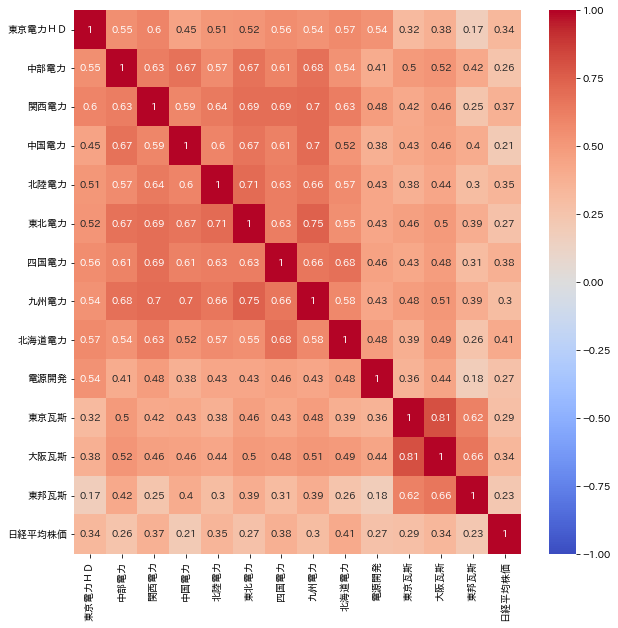

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = df_rate.corr()
fig = plt.subplots(figsize=(10,10))
#heatmap = sns.heatmap(corr_mat, annot=True, square=True, cmap='bwr')
#ヒートマップ 
sns.heatmap(corr_mat, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

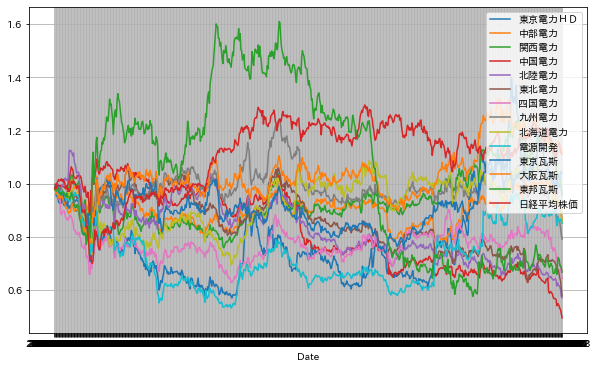

In [25]:
#累積リターン株価推移
df_rate.cumsum().apply(np.exp).plot(figsize=(15, 6));  
plt.grid();
plt.savefig('fts_03.png');

In [26]:
#df_rate_mean = (df_rate.dropna().mean() + 1.0)**250-1.0
df_rate_mean = (df_rate.mean() + 1.0)**250-1.0
df_rate_mean

東京電力ＨＤ   -0.017
中部電力     -0.051
関西電力     -0.013
中国電力     -0.229
北陸電力     -0.187
東北電力     -0.183
四国電力     -0.150
九州電力     -0.083
北海道電力    -0.058
電源開発     -0.057
東京瓦斯      0.014
大阪瓦斯      0.042
東邦瓦斯     -0.139
日経平均株価    0.039
dtype: float64

In [27]:
#df_rate_std = df_rate.dropna().std()*np.sqrt(250)
df_rate_std = df_rate.std()*np.sqrt(250)
df_rate_std

東京電力ＨＤ    0.431
中部電力      0.236
関西電力      0.253
中国電力      0.225
北陸電力      0.267
東北電力      0.242
四国電力      0.267
九州電力      0.251
北海道電力     0.296
電源開発      0.323
東京瓦斯      0.270
大阪瓦斯      0.250
東邦瓦斯      0.382
日経平均株価    0.221
dtype: float64

In [28]:
df_rate_ratio = df_rate_mean / df_rate_std
df_rate_ratio

東京電力ＨＤ   -0.039
中部電力     -0.218
関西電力     -0.053
中国電力     -1.018
北陸電力     -0.700
東北電力     -0.757
四国電力     -0.563
九州電力     -0.331
北海道電力    -0.195
電源開発     -0.177
東京瓦斯      0.052
大阪瓦斯      0.170
東邦瓦斯     -0.364
日経平均株価    0.178
dtype: float64

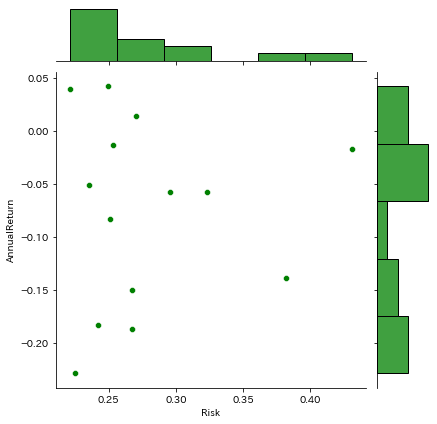

In [29]:
#リスク＆リターン散布図
import seaborn as sns

v_m = pd.DataFrame({'Risk':df_rate_std, 'AnnualReturn':df_rate_mean})
sns.jointplot(x = 'Risk', y = 'AnnualReturn', data=v_m, color="g")

In [30]:
df_rate_std.index.values

array(['東京電力ＨＤ', '中部電力', '関西電力', '中国電力', '北陸電力', '東北電力', '四国電力', '九州電力',
       '北海道電力', '電源開発', '東京瓦斯', '大阪瓦斯', '東邦瓦斯', '日経平均株価'], dtype=object)

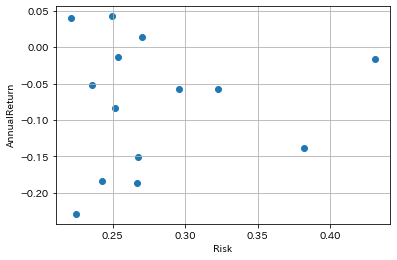

In [31]:
#リスク＆リターン散布図
# 各要素にDataFrameのインデックスの数字をラベルとして付ける
#for i, txt in enumerate(df_rate_std.index.values):
#    plt.annotate(txt, df_rate_std.values[i], df_rate_mean.values[i])
plt.grid()
plt.xlabel("Risk")
plt.ylabel("AnnualReturn")
plt.scatter(df_rate_std, df_rate_mean)
plt.show()

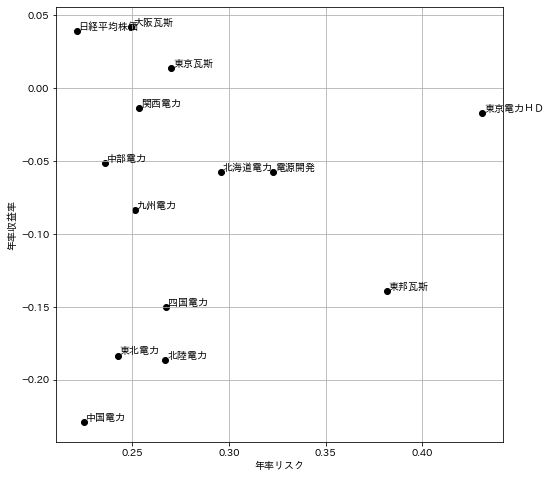

In [32]:
#リスク＆リターン散布図
# 集計データの結合
xy = pd.concat([df_rate_std, df_rate_mean], axis=1)
xy.columns = ['年率リスク', '年率収益率']
# パーセント表示のための設定
pd.options.display.float_format = '{: <10.1%}'.format
# 結果の出力
#xy

# ラベル付き散布図作成
plt.figure(figsize=[8, 8])
plt.scatter(xy['年率リスク'], xy['年率収益率'], color='black')
plt.xlabel('年率リスク')
plt.ylabel('年率収益率')
plt.grid()

for i, j in xy.iterrows():
    plt.annotate(i, xy=(j[0]+0.001, j[1]+0.001))

plt.savefig('sub_positioning.eps', bbox_inches='tight',dpi=600)

In [33]:
df_rate

,東京電力ＨＤ,中部電力,関西電力,中国電力,北陸電力,東北電力,四国電力,九州電力,北海道電力,電源開発,東京瓦斯,大阪瓦斯,東邦瓦斯,日経平均株価
Date,,,,,,,,,,,,,,
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,-2.4%,-1.8%,-1.6%,-0.2%,-1.6%,-1.8%,-2.3%,-1.2%,-2.5%,-1.2%,-1.4%,-2.1%,-2.2%,-1.9%
2020-01-07,-0.2%,0.7%,1.0%,0.0%,0.8%,0.7%,0.6%,-0.3%,0.2%,1.1%,0.1%,0.2%,1.4%,1.6%
2020-01-08,-2.2%,-1.6%,-1.1%,-0.1%,-2.2%,-2.4%,-1.9%,-2.2%,-1.6%,-2.1%,-0.5%,-1.8%,-2.1%,-1.6%
2020-01-09,0.0%,0.5%,0.2%,0.2%,1.2%,0.4%,1.2%,0.2%,0.8%,0.3%,1.7%,0.3%,1.5%,2.3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-06,-1.5%,-1.5%,-1.2%,-1.6%,-0.4%,-2.6%,-1.0%,-1.1%,-0.4%,-1.0%,-0.3%,-0.6%,-0.8%,0.7%
2022-10-07,0.2%,-1.6%,-1.4%,-1.6%,-0.6%,-2.3%,-1.3%,-1.1%,-1.8%,0.4%,-1.5%,-1.8%,-3.4%,-0.7%
2022-10-11,1.3%,-1.3%,-1.0%,-1.0%,-1.7%,-1.6%,-3.1%,-2.4%,-1.1%,0.8%,3.1%,1.0%,0.0%,-2.7%


### OLS Regression

In [34]:
df_rate = df_rate.dropna()

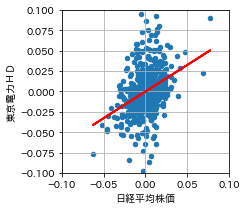

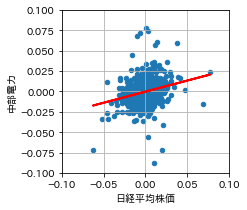

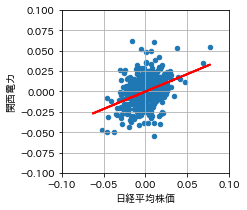

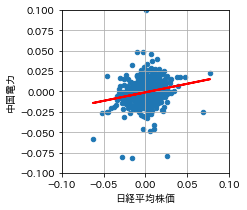

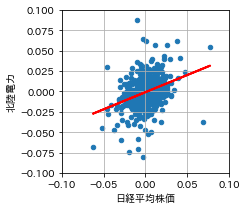

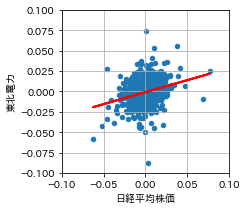

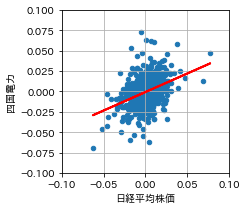

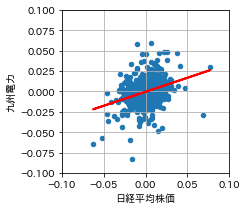

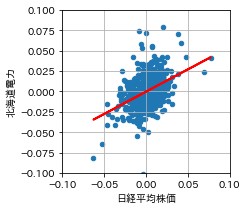

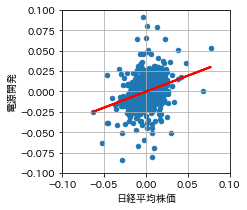

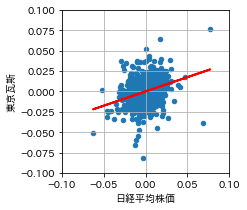

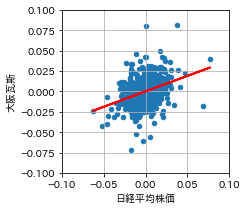

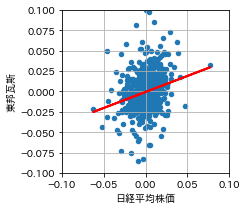

In [35]:
for code in df_list['銘柄名']:
  #reg = np.polyfit(df_rate_nk225['Adj Close'], df_rate[code], deg=1)
  reg = np.polyfit(df_rate['日経平均株価'], df_rate[code], deg=1)
  ax = df_rate.plot(kind='scatter', x='日経平均株価', y=code, figsize=(3, 3))
  #ax = df_rate.plot(kind='scatter', x='1343.T', y=code, figsize=(6, 6)) 
  #ax.plot(df_rate_nk225['Adj Close'], np.polyval(reg, df_rate_nk225['Adj Close']), 'r', lw=2);
  ax.plot(df_rate['日経平均株価'], np.polyval(reg, df_rate['日経平均株価']), 'r', lw=2);
  plt.xlim(-0.1, 0.1);
  plt.ylim(-0.1, 0.1);
  plt.grid()
  plt.savefig('fts_12_' + code + '.png');

In [36]:
#df_rate['日経平均株価']
#df_rate['かんぽ生命保険']

In [37]:
df_list['銘柄名']

3978    東京電力ＨＤ
3979      中部電力
3980      関西電力
3981      中国電力
3982      北陸電力
3983      東北電力
3984      四国電力
3985      九州電力
3986     北海道電力
3988      電源開発
3993      東京瓦斯
3994      大阪瓦斯
3995      東邦瓦斯
Name: 銘柄名, dtype: object

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

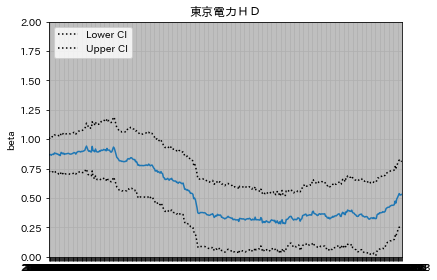

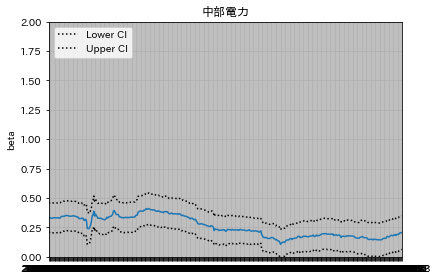

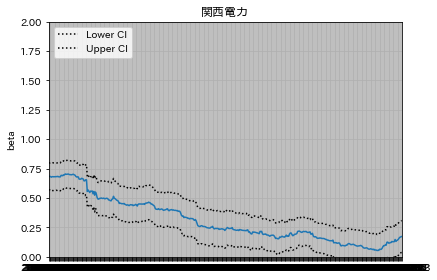

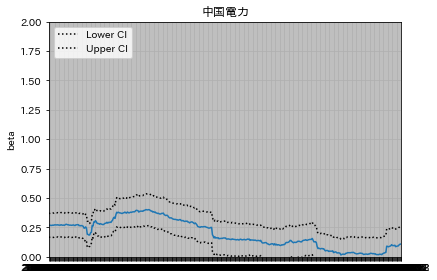

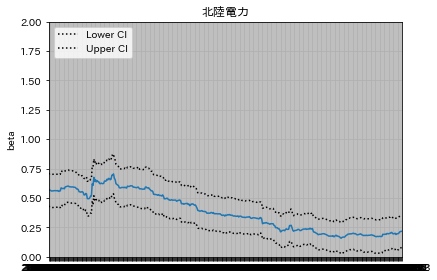

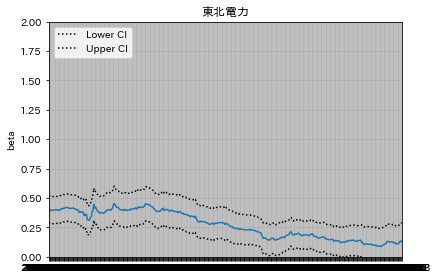

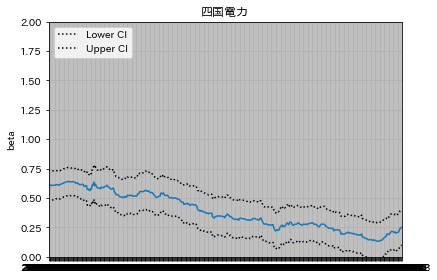

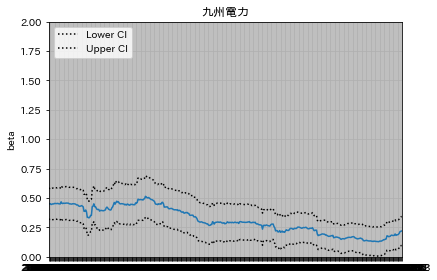

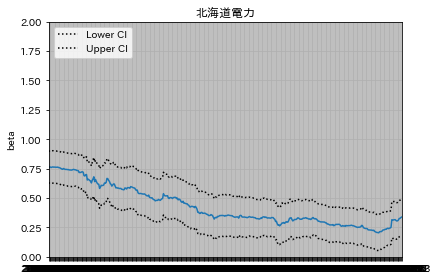

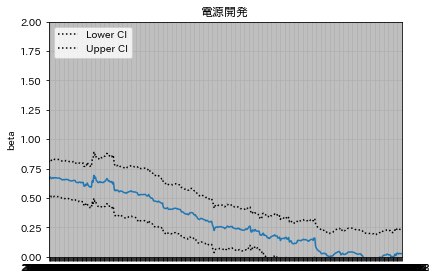

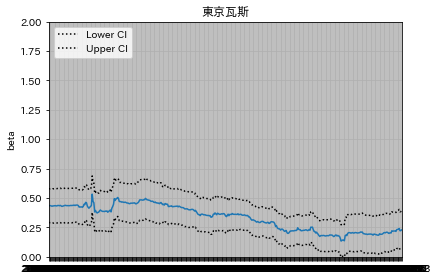

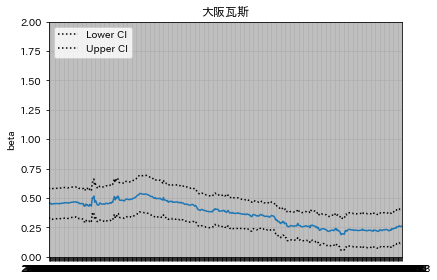

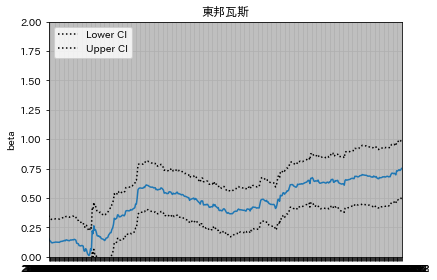

In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

x = df_rate['日経平均株価']
#for code in symbols:
for code in df_list['銘柄名']:
  y = df_rate[code]

  model = RollingOLS(y, sm.add_constant(x), window=246)
  res = model.fit()
  params = res.params
  fig = res.plot_recursive_coefficient(variables = ['日経平均株価'])
# figは図全体のオブジェクトで、内部には複数のsubplotを持てるが、
# 今回は1つのsubplotのみで構成されているので、そのsubplotは
# fig.axes[0]で取得できる。
  ax = fig.axes[0]
  ax.grid()
  ax.set_title(f'{code}')
  ax.set_ylim(0, 2.0)
  ax.set_ylabel('beta')